<a href="https://colab.research.google.com/github/skerryvore/regression_analysis_101/blob/master/notebooks/pyrenees_harker_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Harker Plots**

The python code in this notebook demonstrates how to read in data from an Excel *.csv file, and plot Harker style plots in different ways. 

To run the code in each cell, click the **Run Cell** icon (small white arrow in black circle, top left of cell) that appears when the cell is slected (click mouse cursor inside the code cell to select it). Or to just run all cells and create all plots ij a oner, select **Run all** option from the **Runtime** menu in Colab.

Read in the Roberts et al. data file from Github, and print the first 5 rows to the screen. Change the number in majors.head(5) statement to something else to print more rows.

#Setup and read in data

In [1]:
%matplotlib inline

# import the python packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read csv files via link to Github files online (needs internet).
# This can be changed to read files from local hard drive easily.
majors = pd.read_csv('https://raw.githubusercontent.com/skerryvore/regression_analysis_101/master/data/roberts_etal_pyrenees_majors.csv')

# create a python list of all the column names (useful for various things)
oxides = ['SiO2','TiO2','Al2O3','FeO*','MnO','MgO','CaO','Na2O','K2O','P2O5']

# make sure the numerical data are converted to numbers, and not as text strings
for oxide in oxides:
  majors[oxide] = majors[oxide].astype(float)

# Set the index of the dataframe to use sample name
majors.set_index(['Sample'],inplace=True)

# print out the first n rows of the data (change the number n to specify 
# how many rows to print, there are 39 in this data set).

majors.head(5)


,Rock type,SiO2,TiO2,Al2O3,FeO*,MnO,MgO,CaO,Na2O,K2O,P2O5
Sample,,,,,,,,,,,
QH29,Bt tonalite,62.74,0.75,17.47,4.25,0.18,1.91,6.40,4.50,1.61,0.18
QH56,foliated Hbl–Bt granodiorite,60.50,0.75,17.31,6.46,0.20,3.25,5.89,3.35,2.14,0.15
QH70,Bt tonalite,60.32,0.66,17.36,5.16,0.22,2.10,7.30,5.05,1.56,0.27
QH76,Hbl–Bt granodiorite,64.79,0.64,16.87,4.49,0.21,1.72,4.80,3.79,2.53,0.15
QH107,Bt tonalite,68.20,0.45,16.48,2.98,0.18,1.16,3.89,3.79,2.69,0.18


#Manipulate/edit/analyse data
Now we have the data loaded, we can easily analyse and edit or add columns etc to the dataframe. For example, let's calculate the Mg\# for each sample and add this value as a new column.

The Mg\# is calculated using the formula;

\begin{align}
Mg\# =  \frac {\frac{MgO}{40.32}} {\frac{MgO}{40.32} + \frac{FeO}{71.85}}
\end{align}

where MgO and Feo are the weight% values in the relevant columns, and the values 40.32 and 71.85 are the molecular weights of MgO and FeO respectively.



In [3]:
# Calculate the Mg# for each sample and add these to a new column in the dataframe
majors['Mg#'] = (majors['MgO']/40.32) / ((majors['MgO']/40.32) + (majors['FeO*']/71.85))

# Print the first n rows of the dataframe
majors.head(5)


,Rock type,SiO2,TiO2,Al2O3,FeO*,MnO,MgO,CaO,Na2O,K2O,P2O5,Mg#
Sample,,,,,,,,,,,,
QH29,Bt tonalite,62.74,0.75,17.47,4.25,0.18,1.91,6.40,4.50,1.61,0.18,0.444706
QH56,foliated Hbl–Bt granodiorite,60.50,0.75,17.31,6.46,0.20,3.25,5.89,3.35,2.14,0.15,0.472717
QH70,Bt tonalite,60.32,0.66,17.36,5.16,0.22,2.10,7.30,5.05,1.56,0.27,0.420367
QH76,Hbl–Bt granodiorite,64.79,0.64,16.87,4.49,0.21,1.72,4.80,3.79,2.53,0.15,0.405694
QH107,Bt tonalite,68.20,0.45,16.48,2.98,0.18,1.16,3.89,3.79,2.69,0.18,0.409563


#Inspect the data
Once we have read in the data from the Excel *.csv file and created a pandas dataframe, we can use some of the powerful data analysis/visualisation methods of the dataframe object to inspect and review the data BEFORE we start more complex analysis. Always inspect/examine data before you use it, especially if it isn't yours. This is just good practice, and any translation errors, format errors, weird values can be evaluated/corrected.

Below we use the df.describe() method which produces a statistical summary of all the columns that contain numerical values.

In [4]:
# The majors object is the pandas dataframe that contains all our data,
# and calling the describe method generates the output below.

majors.describe()


,SiO2,TiO2,Al2O3,FeO*,MnO,MgO,CaO,Na2O,K2O,P2O5,Mg#
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,59.401795,0.576667,13.898462,6.881026,0.180256,8.736410,5.412821,2.638718,2.133077,0.138205,0.534132
std,10.555718,0.302753,3.801190,4.986249,0.045101,10.385259,2.893843,1.456189,1.463252,0.064517,0.179576
min,36.360000,0.150000,6.580000,1.700000,0.100000,0.370000,1.420000,0.220000,0.080000,0.030000,0.264865
25%,51.380000,0.355000,10.920000,2.870000,0.155000,1.085000,3.020000,1.285000,1.020000,0.090000,0.392318
50%,60.320000,0.490000,15.270000,6.460000,0.190000,3.250000,4.920000,3.240000,1.780000,0.140000,0.477600
75%,69.440000,0.745000,17.075000,9.230000,0.210000,15.145000,7.245000,3.790000,3.330000,0.170000,0.713189
max,75.590000,1.310000,17.940000,27.220000,0.270000,30.490000,12.400000,5.050000,4.830000,0.340000,0.817739


#Visualise the data
Numbers are great, but it is much easier to spot oddities and patterns in data using a visual representation of the data. Why don't we start by creating a figure that includes plots of every column against every column...i.e. all possible pair plots, and for good measure a histogram of all values in each column.

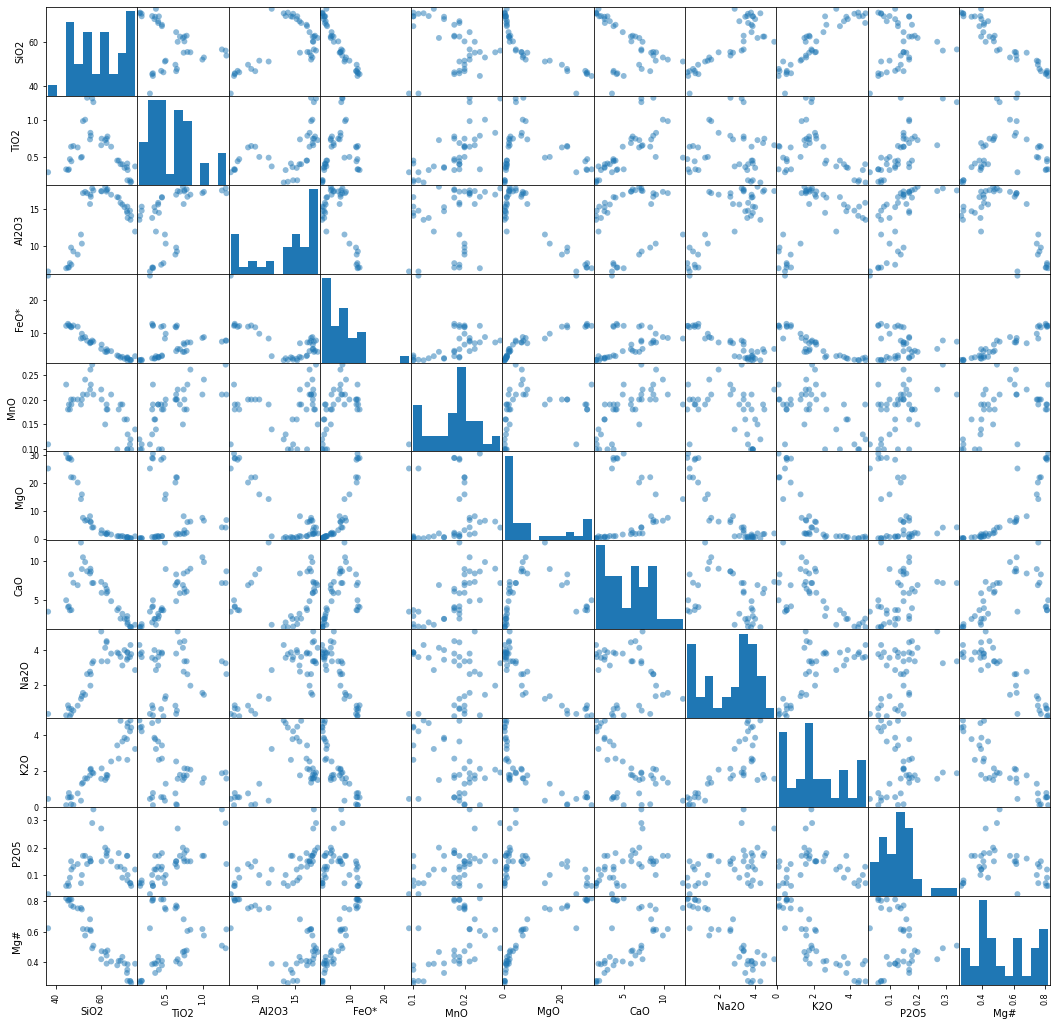

In [5]:
# The line below calls the scatter_matrix function and passes it our majors dataframe,
# and some keyword variables to set the marker style and figure size.

pairplots = pd.plotting.scatter_matrix(majors, marker='o', s=35, figsize=(18,18))



We can set the colour of the points plotted based on the values in any column (or any other range of values), for example we could use the Mg\# values, or you can specify a single colour, e.g. c='black', c='k' for shorthand.


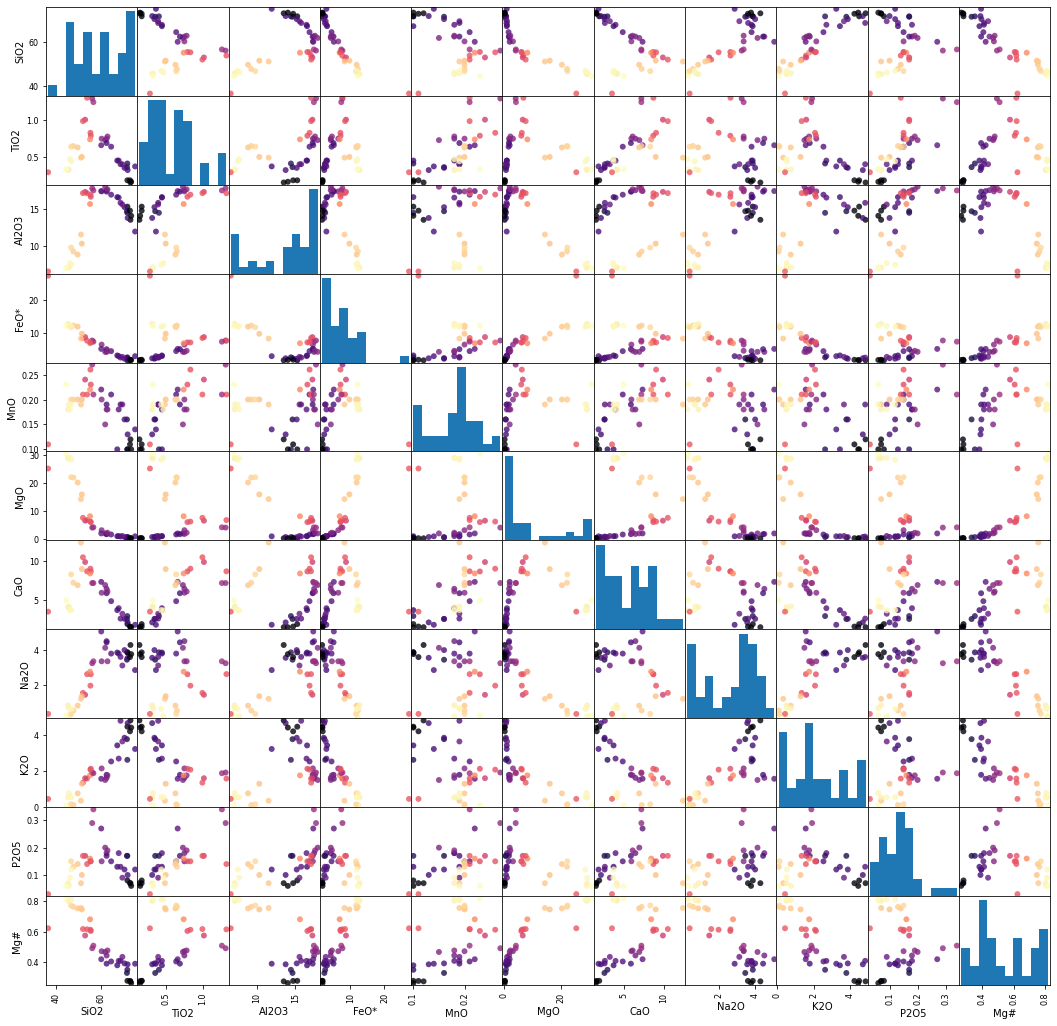

In [7]:
# Create list of values to pass for setting colour of points
colours = majors['Mg#'].values

# The following line creates the pairplots grid by calling the pandas scatter_matrix function, 
# default cmap is used, or specify cmap variable and pass it the cmap you want
# to use (here we use the magma color map, seems appropriate :-)

pairplots = pd.plotting.scatter_matrix(majors, marker='o', s=35, \
                            c=colours, cmap='magma', alpha=0.8,figsize=(18,18))

In [ ]:
# To print a list of built-in color maps, uncomment the line below and run this command. 
# The list is looooonnnngg :-)
#plt.colormaps()

#Simple Harker Plot
Plot a single Harker plot. To change the oxides in the plot just edit the column names in the ax.scatter() statement to use different oxides. In this example SiO2 is plooted on the x-axis versus TiO2.

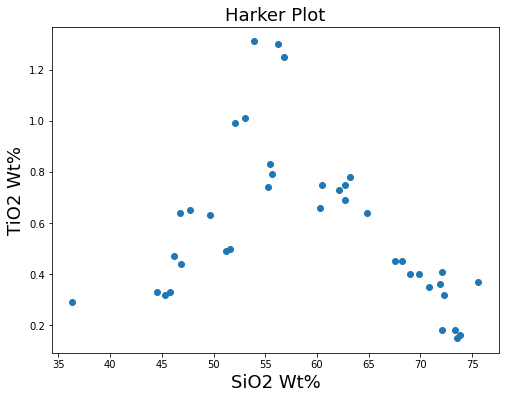

In [10]:
# Plot harker plot for selected oxide

# This statement creates a figure object, and an axes object
fig, ax = plt.subplots(1,1,figsize=(8,6))

# This statement draws the plot in the axes object
ax.scatter(majors['SiO2'].values, majors['TiO2'].values)

# Set some items for the axes
ax.set_xlabel('SiO2 Wt%',fontsize=18)
ax.set_ylabel('TiO2 Wt%',fontsize=18)
ax.set_title('Harker Plot',fontsize=18)

# Uncoment this line if you want to save the figure to a file
#plt.savefig('harker_plot.pdf',format='pdf')

# Show the plot on the screen
fig.show()

#Harker plot with variable colour and symbol size
To enrich the information on the Harker plot we could use symbol size and colour to indicate other parameter values, e.g. Mg# (as colour) and K2O (as size) for example.

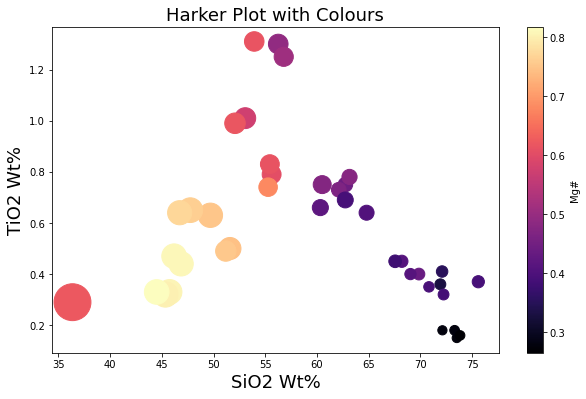

In [43]:
# Plot harker plot for selected oxide with colour and symbol size

# This statement creates a figure object, and an axes object
fig, ax = plt.subplots(1,1,figsize=(10,6))

colour_column = 'Mg#'
colours = majors[colour_column].values
sizes = majors['FeO*'].values*50

# This statement draws the plot in the axes object
p = ax.scatter(majors['SiO2'].values, majors['TiO2'].values,c=colours, \
               cmap='magma', s=sizes)

# Set some items for the axes
ax.set_xlabel('SiO2 Wt%',fontsize=18)
ax.set_ylabel('TiO2 Wt%',fontsize=18)
ax.set_title('Harker Plot with Colours',fontsize=18)
fig.colorbar(p, ax=ax, label=colour_column)

# Uncoment this line if you want to save the figure to a file
#plt.savefig('harker_plot_colours.pdf',format='pdf')

# Show the plot on the screen
fig.show()

#Harker plot with categories for points
In the next plot we use the handy groupby method in the pandas dataframe, to group the data by the rock type listed in the column for Rock type.

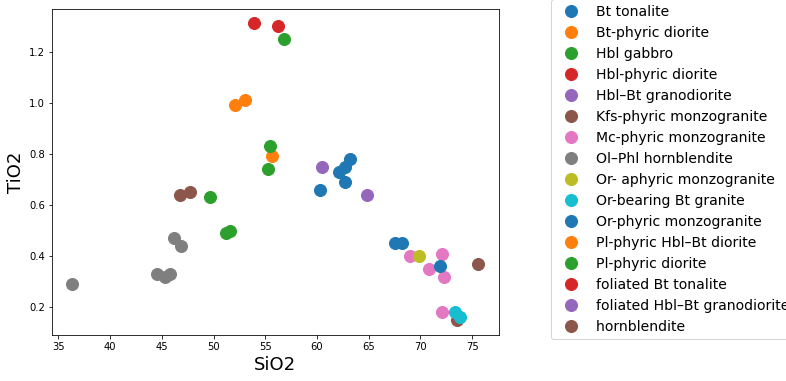

In [17]:
groups = majors.groupby('Rock type')

# Plot harker plot in groups by rock type
fig, ax = plt.subplots(1,1,figsize=(8,6))

for name, group in groups:
    ax.plot(group.SiO2, group.TiO2, marker='o', linestyle='', ms=12, label=name)

ax.set_ylabel('TiO2',fontsize=18)
ax.set_xlabel('SiO2',fontsize=18)

fig.legend(fontsize=14, bbox_to_anchor=(1.4, 0.9))

plt.show()

#Create multiple Harker plots
In the next code cell below, we plot a number of Harker plots on one diagram. You can edit the list of oxides to plot by adding or deleting oxides from the **selection** list. The code will count the number of oxides selected and plot a Harker plot for each, and label it correctly. You can also change the reference oxide if you wish (here it is set to be SiO2).

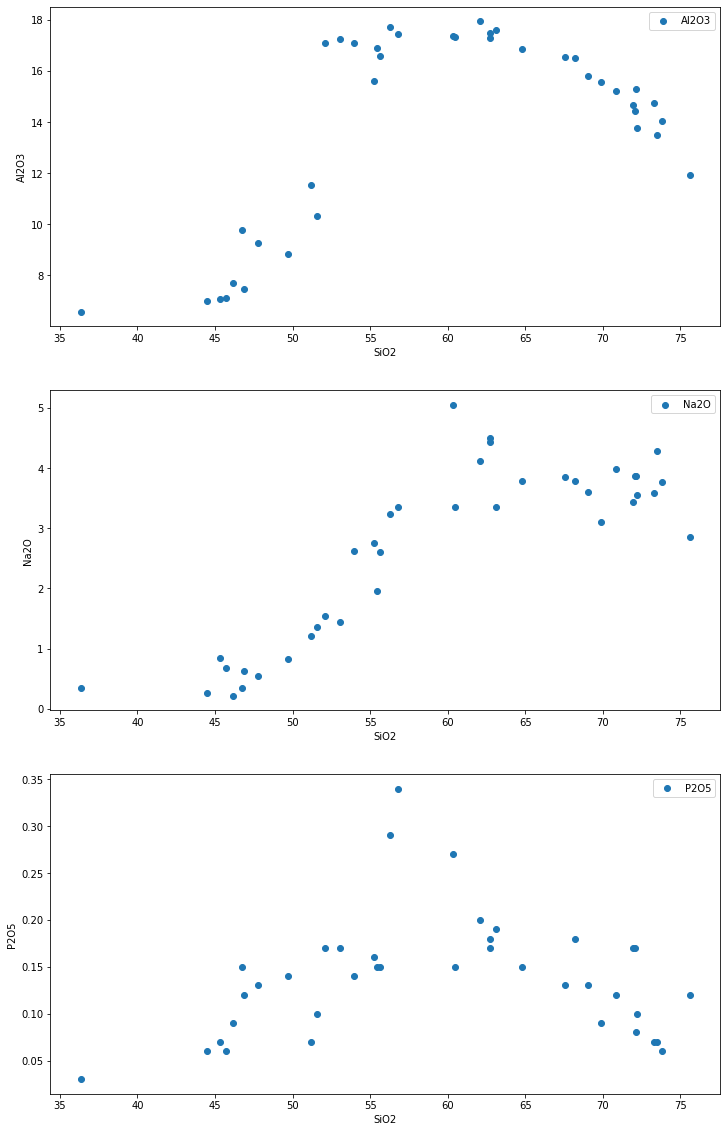

In [ ]:
selection = ['Al2O3','Na2O','P2O5']

# Plot harker plots for selection of oxides
fig, ax = plt.subplots(len(selection),1,figsize=(12,20))

for i, oxide in enumerate(selection):
   ax[i].scatter(majors['SiO2'].values, majors[oxide].values, label=oxide)
   ax[i].legend(loc='upper right')
   ax[i].set_ylabel(oxide)
   ax[i].set_xlabel('SiO2')

fig.show()

# Why not plot them all then :-)
In the final code cell below, we layout an array of plots in a grid format, and plot and label all the graphs appropriately.

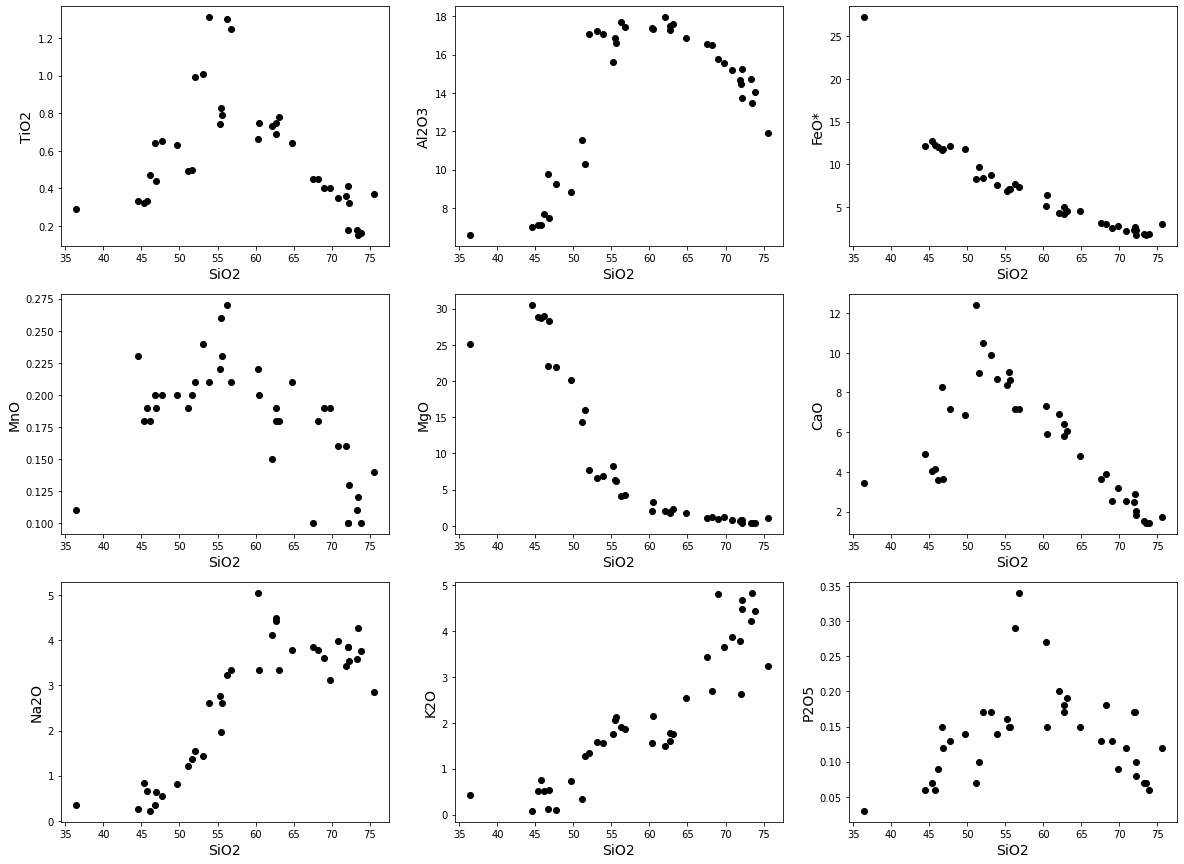

In [42]:

selection = ['TiO2','Al2O3','FeO*','MnO','MgO','CaO','Na2O','K2O','P2O5']

# Plot harker plots for selection of oxides
fig, ax = plt.subplots(3,3,figsize=(20,15))

rows = [0,0,0,1,1,1,2,2,2]
cols = [0,1,2,0,1,2,0,1,2]

for row, col, oxide in (zip(rows,cols,selection)):
   ax[row,col].scatter(majors['SiO2'].values, majors[oxide].values, c='k', label=oxide)
#   ax[row,col].legend(fontsize=14,loc='upper right')
   ax[row,col].set_ylabel(oxide, fontsize=14)
   ax[row,col].set_xlabel('SiO2',fontsize=14)

fig.show()